In [2]:
# Variable	Description
# Item_Identifier	Unique product ID
# Item_Weight	Weight of product
# Item_Fat_Content	Whether the product is low fat or not
# Item_Visibility	The % of total display area of all products in a store allocated to the particular product
# Item_Type	The category to which the product belongs
# Item_MRP	Maximum Retail Price (list price) of the product
# Outlet_Identifier	Unique store ID
# Outlet_Establishment_Year	The year in which store was established
# Outlet_Size	The size of the store in terms of ground area covered
# Outlet_Location_Type	The type of city in which the store is located
# Outlet_Type	Whether the outlet is just a grocery store or some sort of supermarket
# Item_Outlet_Sales	Sales of the product in the particular store. This is the outcome variable to be predicted.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('train_v9rqX0R.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
df.shape

(8523, 12)

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df['Item_Weight'].fillna(df['Item_Weight'].median(),inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace =True)

In [9]:
# df['Outlet_Type'].value_counts()
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})      

In [10]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

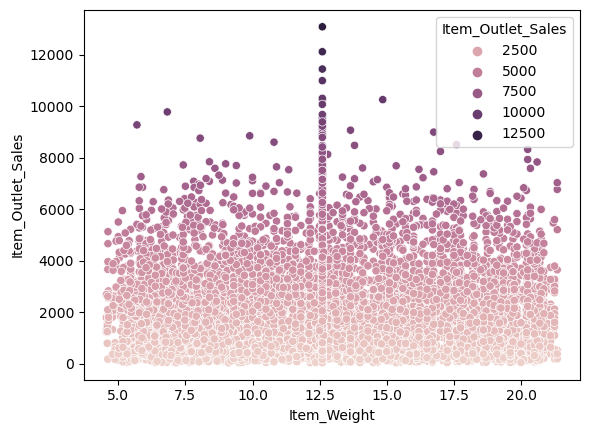

In [11]:
sns.scatterplot(data=df,x='Item_Weight',y='Item_Outlet_Sales',hue='Item_Outlet_Sales')

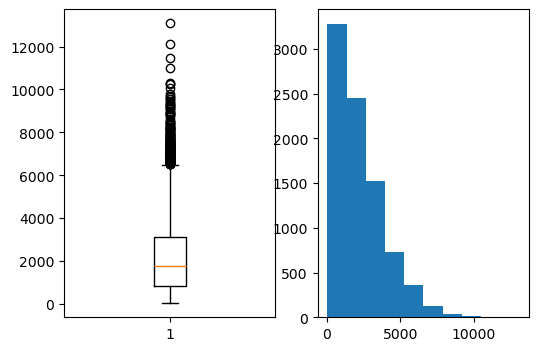

In [12]:
fig, ax= plt.subplots(1,2, figsize=(6,4))
ax[0].boxplot(df['Item_Outlet_Sales'])
ax[1].hist(df['Item_Outlet_Sales'])
plt.show()

C:\Users\komal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\komal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

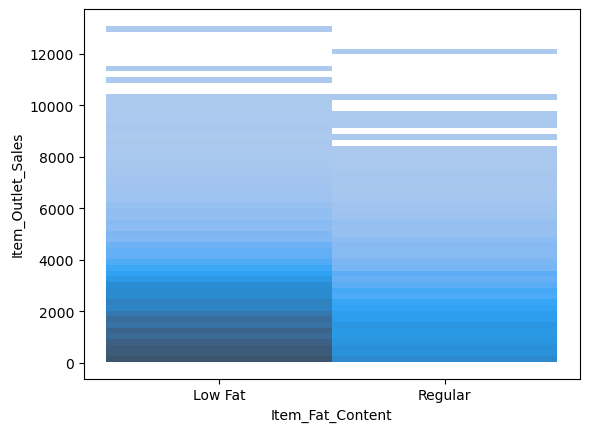

In [13]:
sns.histplot(data=df,x='Item_Fat_Content',y='Item_Outlet_Sales')

In [14]:
df['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

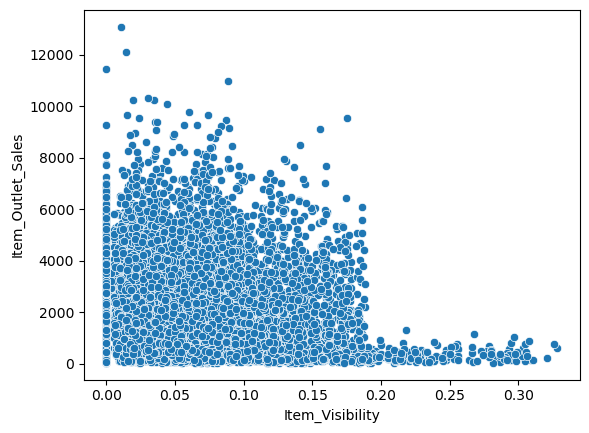

In [15]:
sns.scatterplot(data=df,x='Item_Visibility',y='Item_Outlet_Sales')

<Axes: xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

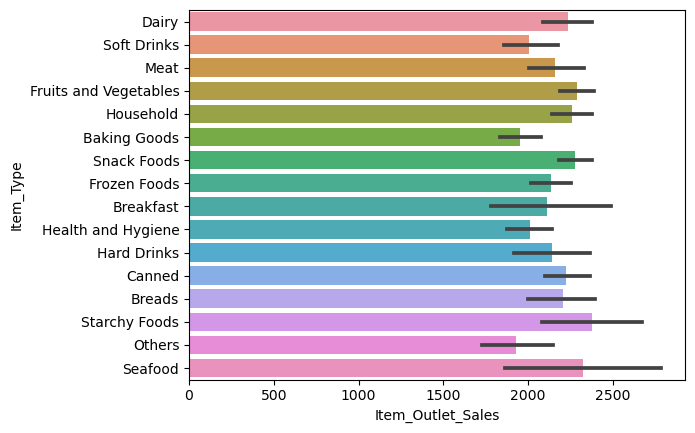

In [16]:
sns.barplot(data=df,y='Item_Type',x='Item_Outlet_Sales')

<Axes: xlabel='Item_MRP', ylabel='Item_Type'>

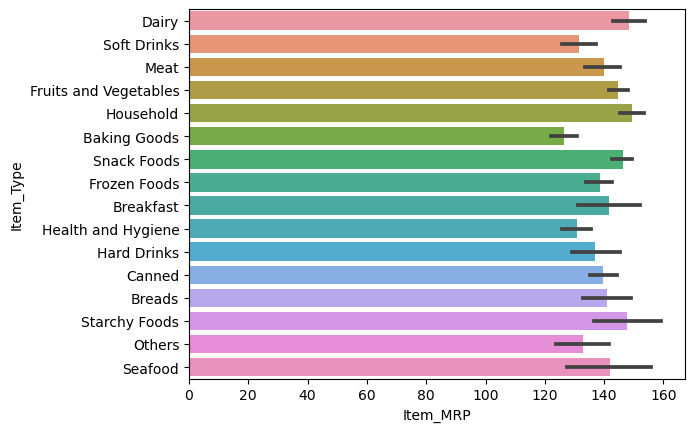

In [17]:
sns.barplot(data=df,y='Item_Type',x='Item_MRP')

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

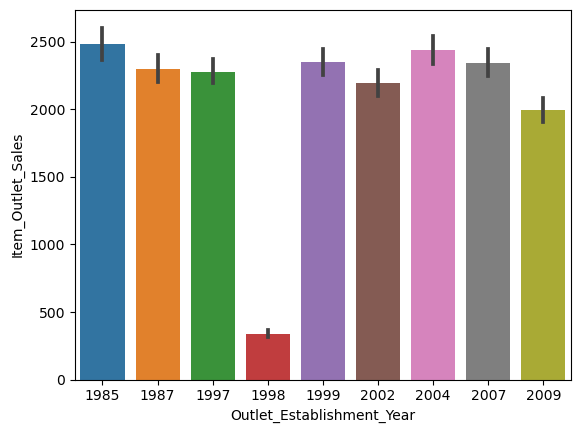

In [126]:
sns.barplot(data=df,x='Outlet_Establishment_Year',y='Item_Outlet_Sales')

<Axes: xlabel='Item_Outlet_Sales', ylabel='Outlet_Size'>

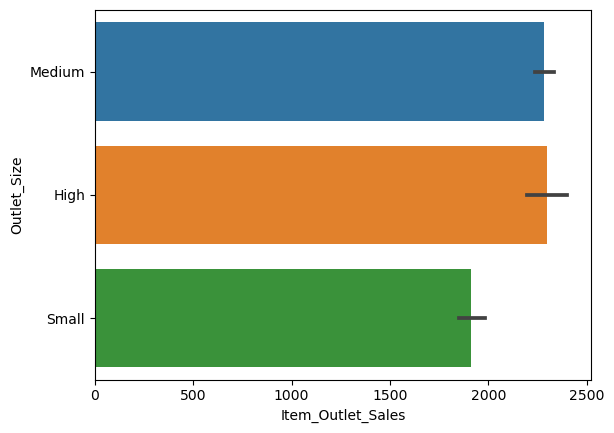

In [115]:
sns.barplot(data=df, x='Item_Outlet_Sales', y='Outlet_Size')

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

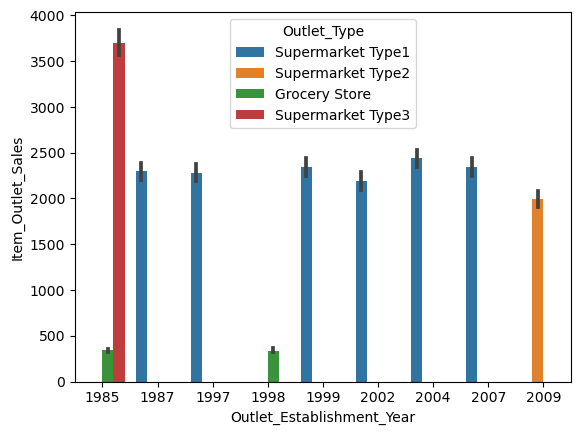

In [135]:
sns.barplot(data=df,x='Outlet_Establishment_Year',y='Item_Outlet_Sales',hue='Outlet_Type')

In [ ]:
# grouped = df.groupby(['Outlet_Establishment_Year','Outlet_Size', 'Item_Outlet_Sales']).size().reset_index(name='Count')
# grouped

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

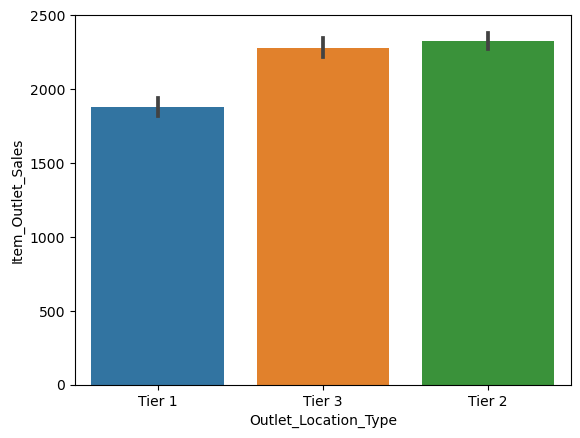

In [138]:
sns.barplot(data=df,x='Outlet_Location_Type',y='Item_Outlet_Sales')

<Axes: xlabel='Item_Outlet_Sales', ylabel='Item_MRP'>

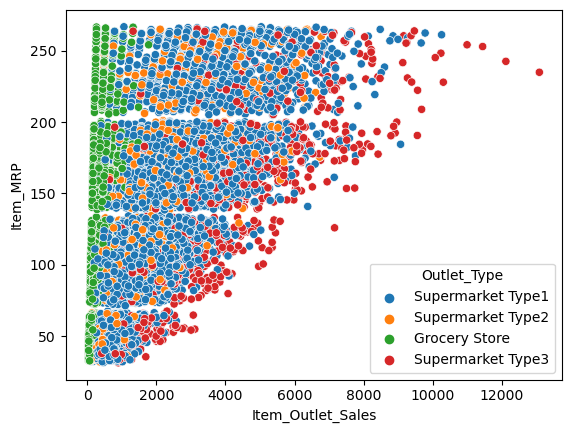

In [147]:
sns.scatterplot(data=df,y='Item_MRP',x='Item_Outlet_Sales',hue='Outlet_Type')

In [117]:
# df= pd.get_dummies(df, columns = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'],dtype=float)
# df

In [118]:
# Item_Identifier= df['Item_Identifier']
# Outlet_Identifier=df['Outlet_Identifier']

In [119]:
# df=df.drop(['Item_Identifier','Outlet_Identifier'],axis =1)
# df